## Initial  Setup

In [1]:
#Initial imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st



## Reading Dataset 

In [2]:
#Loading dataset to python

df = pd.read_csv("D:\\Data Science and Analytics\\CaseStudy 9\\Wine.csv")
df.head()


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Cleaning and preprocessing

In [3]:
df.shape

(178, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
#Checking null vales

df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [7]:
#There are no null values

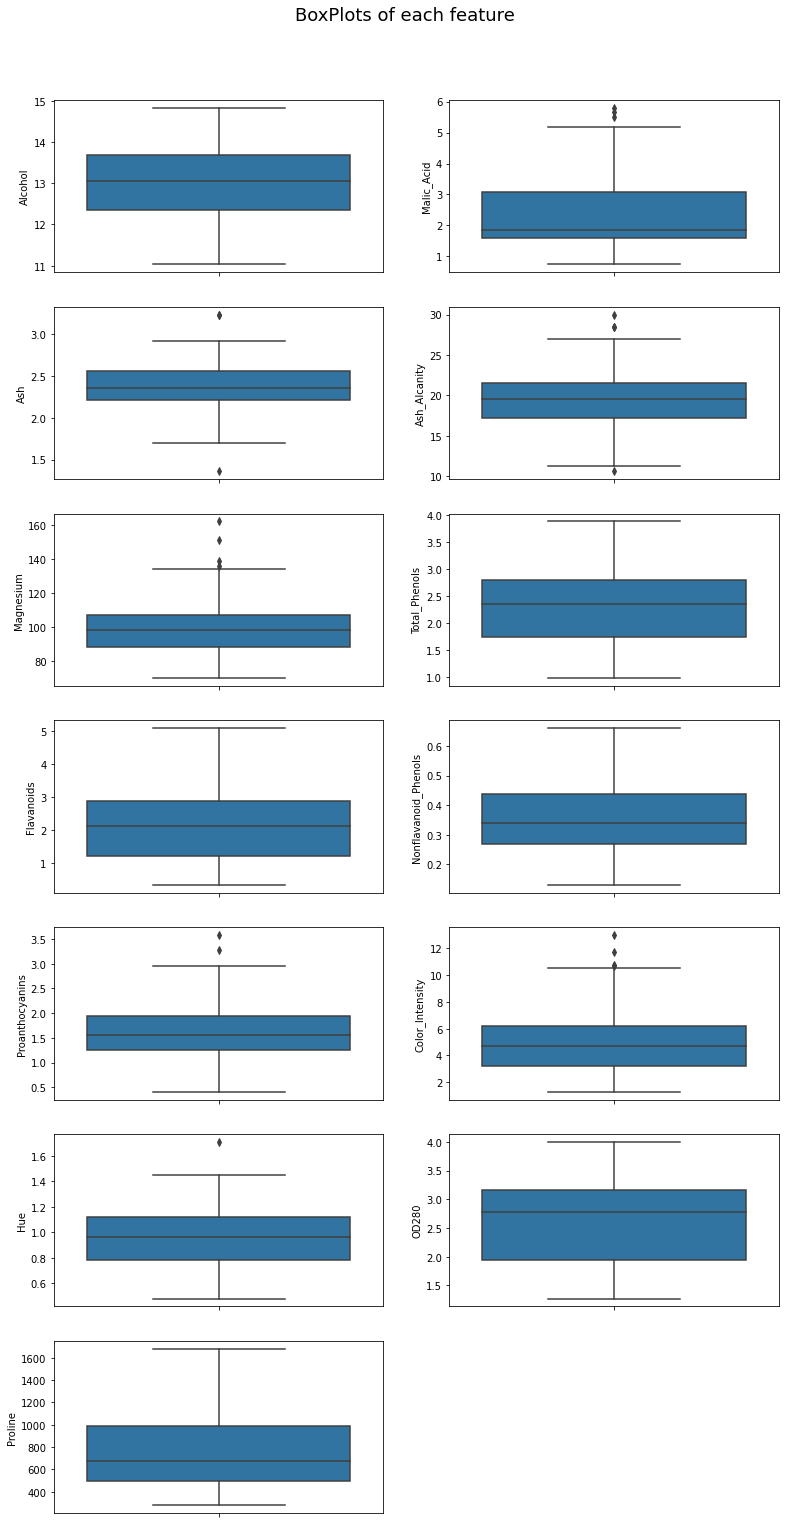

In [8]:
#Checking outliers

fig,ax= plt.subplots(figsize=(13,26))
fig.suptitle('BoxPlots of each feature', fontsize=18, y=0.93)
i=1

for column in df:
    ax1=plt.subplot(7,2,i)
    sns.boxplot(data=df, y=df[column],ax=ax1)
    i=i+1

In [9]:
#There are outliers in 7 out of 13 columns
dfOutliers =df[["Malic_Acid","Ash","Ash_Alcanity","Magnesium","Proanthocyanins","Color_Intensity","Hue"]]

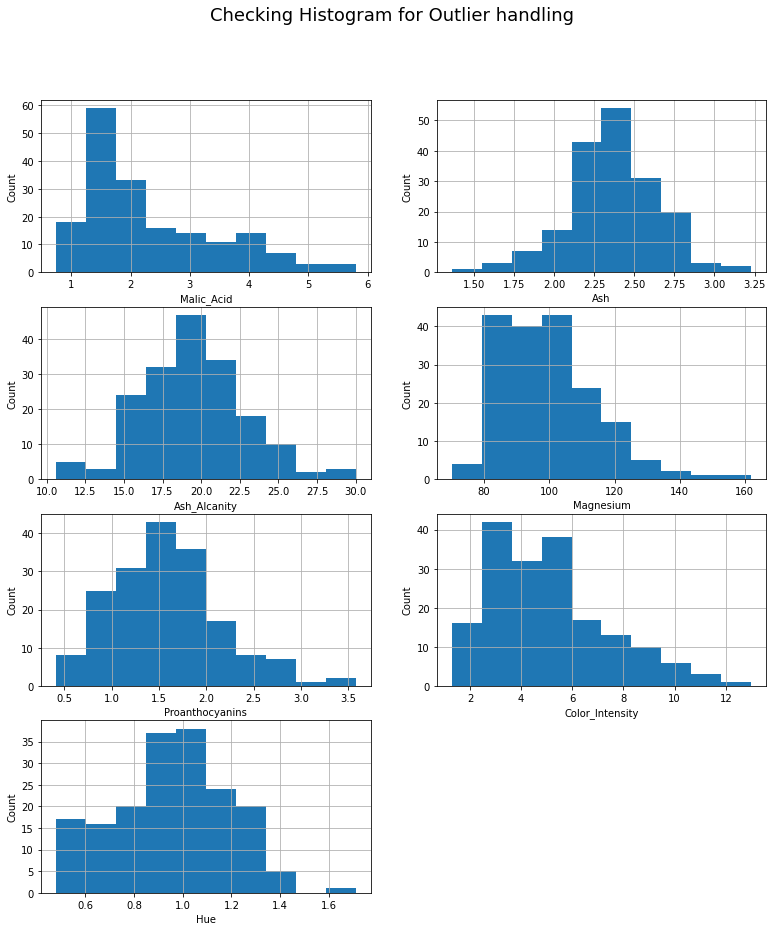

In [10]:
fig,ax= plt.subplots(figsize=(13,26))
fig.suptitle('Checking Histogram for Outlier handling', fontsize=18, y=0.93)
i=1

for column in dfOutliers:
    ax1=plt.subplot(7,2,i)
    skewgraph = dfOutliers[column]
    plt.xlabel(column)
    plt.ylabel("Count")
    skewgraph.hist(ax=ax1)
    i=i+1
#skewgraph = df["SL"]
#skewgraph.hist(figsize=(10,5))
#plt.show

In [11]:
import scipy.stats as stats

In [12]:
#Since all values are skewed, we can use median to replace outliers.

for column in dfOutliers:
    Q1=dfOutliers[column].quantile(q=.25)
    Q2=dfOutliers[column].quantile(q=.5)
    Q3=dfOutliers[column].quantile(q=.75)
    IQR= Q3-Q1
    lowerHand = Q1-(1.5*IQR)
    higherHand = Q3+(1.5*IQR)
    df.loc[df[column]<lowerHand,column]=Q2
    df.loc[df[column]>higherHand,column]=Q2

In [13]:
#Scaling data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# transform data
dfScaled = scaler.fit_transform(df)
dfScaled =pd.DataFrame(dfScaled,columns=list(df))

# Unsupervised Learning
## * K-means clustering

C:\Users\Amal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


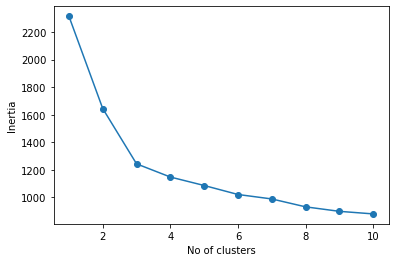

In [14]:
#First let's find out optimum number of clusters using elbow method

from sklearn.cluster import KMeans

ks=range(1,11)
inertia=[]
for k in ks:
    model=KMeans(n_clusters = k)
    model.fit(dfScaled)
    inertia.append(model.inertia_)
    
plt.plot(ks,inertia,"-o")
plt.xlabel("No of clusters")
plt.ylabel("Inertia")
plt.show()

In [15]:
#Here we can take 3 as number of cluster

In [16]:
#Create Model
model_kmeans=KMeans(n_clusters=3)
model_kmeans.fit(dfScaled)
labels = model_kmeans.predict(dfScaled)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 2 0 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [17]:
dfScaled.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.547641,0.273971,-1.254501,2.322386,0.808997,1.034819,-0.659563,1.344130,0.352805,0.392826,1.847920,1.013009
1,0.246290,-0.479490,-0.901621,-2.712903,0.111335,0.568648,0.733629,-0.820719,-0.540944,-0.250988,0.438116,1.113449,0.965242
2,0.196879,0.085189,1.246874,-0.260136,0.193225,0.808997,1.215533,-0.498407,2.314663,0.371973,0.347536,0.788587,1.395148
3,1.691550,-0.313981,0.557734,-0.856755,1.175915,2.491446,1.466525,-0.981875,1.138825,1.387878,-0.422392,1.184071,2.334574
4,0.295700,0.309113,2.057627,0.535356,1.585369,0.808997,0.663351,0.226796,0.466917,-0.279740,0.392826,0.449601,-0.037874


<AxesSubplot:xlabel='Proline', ylabel='Flavanoids'>

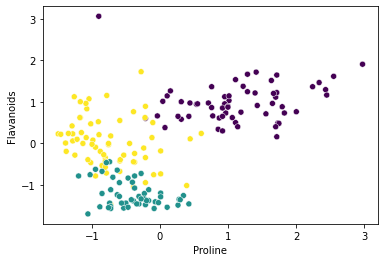

In [18]:
sns.scatterplot(y=dfScaled["Flavanoids"],x=dfScaled["Proline"],c=labels)

In [19]:
#Here we have classified the data to three clusters

## * Agglomerative  Hierarchical clustering

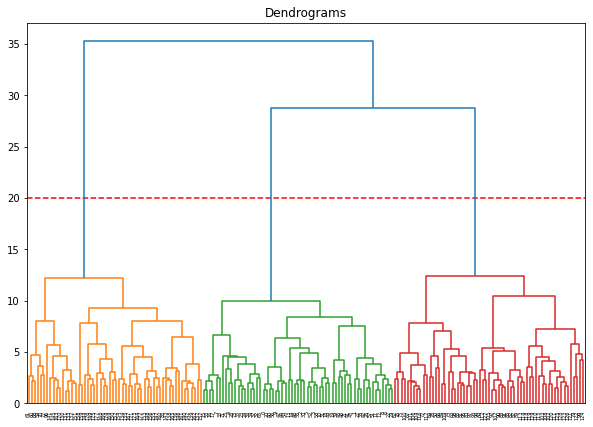

In [20]:
#Dendogram for optimal number of cluster
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
plt.hlines(20,0,5000,colors="r",linestyles="dashed")
dend = shc.dendrogram(shc.linkage(dfScaled, method='ward'))

In [21]:
#From dendogram we get 3 clusters

In [22]:
#Creating models
from sklearn.cluster import AgglomerativeClustering

AgloClus = AgglomerativeClustering(n_clusters = 3)

labels = AgloClus.fit_predict(dfScaled)
print(labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 1 1 1 0 0 0 2 0 0 1 0 1 2 0 2
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


<AxesSubplot:xlabel='Proline', ylabel='Flavanoids'>

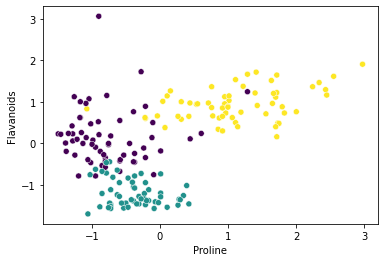

In [23]:
sns.scatterplot(y=dfScaled["Flavanoids"],x=dfScaled["Proline"],c=labels)

In [24]:
#We have successfully created model using Agglomerative Hierarchical clustering.